## Combining Thresholds to get the Lane Lines

In [1]:
# Import Dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
# Read Image
img = imread('./road.jpg')

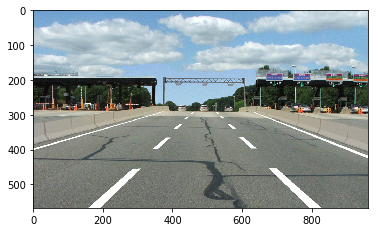

In [3]:
plt.imshow(img)

In [4]:
# Functions
# Input: Grayscale Image
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Calculate Absolute of Sobel Gradients
    sobel_abs = np.absolute(sobel)
    
    # Scaling Sobel Gradients
    #scaled_sobel = np.uint8(255*sobel_abs/np.max(sobel_abs))
    
    # Convert the Sobel Gradients to Binary
    grad_binary = np.zeros_like(sobel_abs)
    
    # and Apply Threshold
    grad_binary[(sobel_abs >= thresh[0]) & (sobel_abs <= thresh[1])] = 1
    
    return grad_binary

In [5]:
# Function to Calculate Magnitude of the Gradients
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude
    sobel_mag = np.sqrt((sobel_x * sobel_x) + (sobel_y * sobel_y))
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    #scaled_sobel = np.uint8(255*sobel_mag/np.max(sobel_mag))
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(sobel_mag)
    binary_output[(sobel_mag >= mag_thresh[0]) & (sobel_mag <= mag_thresh[1])] = 1
    # Apply threshold
    return binary_output

In [6]:
# Function to get Gradient Direction
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Take the absolute value of the x and y gradients
    sobelx_abs = np.absolute(sobel_x)
    sobely_abs = np.absolute(sobel_y)
    
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction_of_gradient = np.arctan2(sobely_abs,sobelx_abs)
    
    # Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(direction_of_gradient)
    binary_output[(direction_of_gradient >= thresh[0]) & (direction_of_gradient <= thresh[1])] = 1
    
    return binary_output

In [7]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

image = img

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))

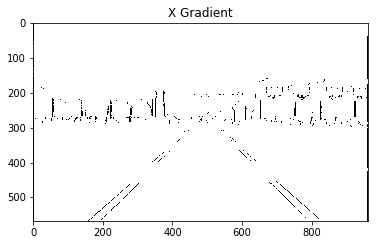

In [8]:
plt.title('X Gradient')
plt.imshow(gradx, cmap='gray')

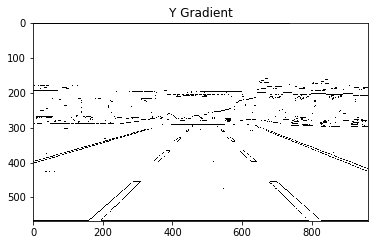

In [9]:
plt.title('Y Gradient')
plt.imshow(grady, cmap='gray')

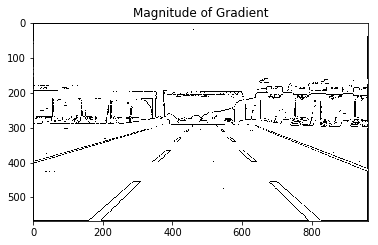

In [10]:
plt.title('Magnitude of Gradient')
plt.imshow(mag_binary, cmap='gray')

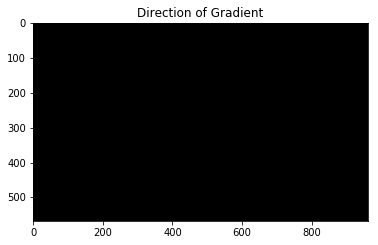

In [11]:
plt.title('Direction of Gradient')
plt.imshow(dir_binary, cmap='gray')

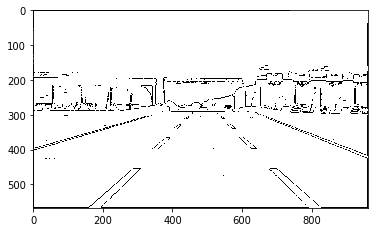

In [12]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

plt.imshow(combined, cmap='gray')